In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()


In [36]:
!pip install keras-tcn

In [37]:
from tensorflow.keras.utils import to_categorical
from tcn import compiled_tcn

In [38]:
DDoS=pd.read_csv('/content/dataset_sdn.csv')

In [39]:
DDoS.Protocol.unique()
DDoS['Protocol'] = DDoS['Protocol'].replace('TCP', '0')
DDoS['Protocol'] = DDoS['Protocol'].replace('UDP', '1')
DDoS['Protocol'] = DDoS['Protocol'].replace('ICMP', '2')
DDoS.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [40]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [41]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [42]:

DDoS['src'] = DDoS['src'].replace('10.0.0.0', '0')
DDoS['src'] = DDoS['src'].replace('10.0.0.2', '1')
DDoS['src'] = DDoS['src'].replace('10.0.0.4', '2')
DDoS['src'] = DDoS['src'].replace('10.0.0.10', '3')
DDoS['src'] = DDoS['src'].replace('10.0.0.5', '4')
DDoS['src'] = DDoS['src'].replace('10.0.0.13', '5')
DDoS['src'] = DDoS['src'].replace('10.0.0.6', '6')
DDoS['src'] = DDoS['src'].replace('10.0.0.11', '7')
DDoS['src'] = DDoS['src'].replace('10.0.0.20', '8')
DDoS['src'] = DDoS['src'].replace('10.0.0.18', '9')
DDoS['src'] = DDoS['src'].replace('10.0.0.12', '10')
DDoS['src'] = DDoS['src'].replace('10.0.0.14', '11')
DDoS['src'] = DDoS['src'].replace('10.0.0.15', '12')
DDoS['src'] = DDoS['src'].replace('10.0.0.16', '13')
DDoS['src'] = DDoS['src'].replace('10.0.0.17', '14')
DDoS['src'] = DDoS['src'].replace('10.0.0.1', '15')
DDoS['src'] = DDoS['src'].replace('10.0.0.3', '16')
DDoS['src'] = DDoS['src'].replace('10.0.0.8', '17')
DDoS['src'] = DDoS['src'].replace('10.0.0.7', '18')
DDoS['src'] = DDoS['src'].replace('10.0.0.9', '19')
DDoS.src.unique()

array(['15', '1', '2', '3', '16', '4', '5', '6', '8', '7', '10', '9',
       '17', '18', '19', '11', '12', '13', '14'], dtype=object)

In [43]:
DDoS['dst'] = DDoS['dst'].replace('10.0.0.8', '0')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.7', '1')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.2', '2')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.4', '3')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '4')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.10', '5')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.3', '6')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '7')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.5', '8')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.9', '9')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.12', '10')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.13', '11')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.14', '12')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.11', '13')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.16', '14')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.1', '15')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.15', '16')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.17', '17')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.18', '18')
DDoS.dst.unique()

array(['0', '1', '6', '8', '5', '11', '15', '13', '2', '3', '9', '4',
       '12', '16', '10', '14', '17', '18'], dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# Apply labelencoder object on columns
labelencoder.fit_transform(DDoS['src'])

array([ 6,  6,  0, ..., 16, 16, 16])

In [45]:
from sklearn.preprocessing import LabelEncoder

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# Apply labelencoder object on columns
labelencoder.fit_transform(DDoS['dst'])

array([ 0,  0,  0, ..., 16, 16, 16])

In [46]:
from sklearn.model_selection import train_test_split
X = DDoS[['src','dst','dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]
y = DDoS['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=2,
                         nb_filters=22,
                         activation='relu',
                         kernel_initializer='he_normal',
                         use_batch_norm=False,
                         use_layer_norm=False,
                         use_weight_norm=False,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(2)],
                         nb_stacks=1,
                         max_len=X_train[0:1].shape[1],
                         use_skip_connections=True)

x.shape= (None, 22)
model.x = (None, 22, 1)
model.y = (None, 2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 22, 1)]           0         
                                                                 
 tcn (TCN)                   (None, 22)                8976      
                                                                 
 dense_6 (Dense)             (None, 2)                 46        
                                                                 
 activation_6 (Activation)   (None, 2)                 0         
                                                                 
Total params: 9,022
Trainable params: 9,022
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train, y_train, epochs = 20,validation_split=0.2,verbose = 1)

Epoch 1/20
2087/2087 [==============================] - 21s 10ms/step - loss: 0.1388 - accuracy: 0.9445 - val_loss: 0.0589 - val_accuracy: 0.9758
Epoch 2/20
2087/2087 [==============================] - 20s 9ms/step - loss: 0.0662 - accuracy: 0.9726 - val_loss: 0.0453 - val_accuracy: 0.9814
Epoch 3/20
2087/2087 [==============================] - 22s 10ms/step - loss: 0.0491 - accuracy: 0.9800 - val_loss: 0.0332 - val_accuracy: 0.9863
Epoch 4/20
2087/2087 [==============================] - 20s 9ms/step - loss: 0.0407 - accuracy: 0.9836 - val_loss: 0.0309 - val_accuracy: 0.9893
Epoch 5/20
2087/2087 [==============================] - 20s 9ms/step - loss: 0.0351 - accuracy: 0.9861 - val_loss: 0.0228 - val_accuracy: 0.9907
Epoch 6/20
2087/2087 [==============================] - 20s 9ms/step - loss: 0.0306 - accuracy: 0.9879 - val_loss: 0.0285 - val_accuracy: 0.9900
Epoch 7/20
2087/2087 [==============================] - 21s 10ms/step - loss: 0.0263 - accuracy: 0.9901 - val_loss: 0.0158 - val

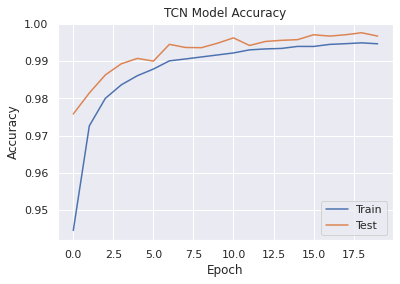

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('TCN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('TCN Model Accuracy.png')
plt.show()

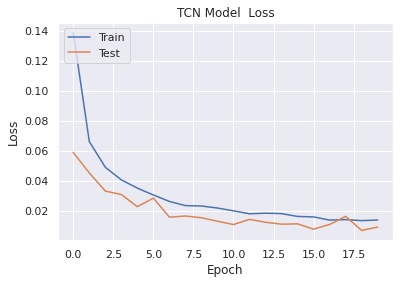

In [52]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('TCN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('TCN Model Loss.png')
plt.show()

In [53]:
predict = model.predict(X_test, verbose=1)

653/653 [==============================] - 2s 3ms/step


In [54]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

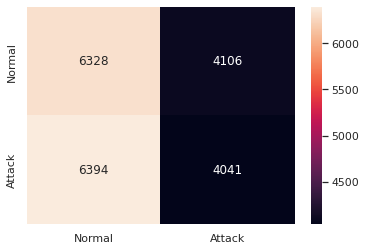

In [55]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Normal","Attack"],columns = ["Normal","Attack"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [56]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.65%
